# **Fruit Classification using Feedforward Neural Networks in PyTorch**

In [ ]:
It contains the dataset of images containing fruits.
In this notebook i am going to apply feedforward neural networks to classify the 131 classes of fruits

In [4]:
# imports
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split

In [5]:
project_name='fruit-classification-using-feedforward-neural-networks'

In [6]:
train_dataset_url="../input/fruits/fruits-360/Training"
test_dataset_url="../input/fruits/fruits-360/Test"

In [7]:
# creating train and test folders
train_folder=os.listdir(train_dataset_url)
test_folder=os.listdir(test_dataset_url)

In [8]:
# checking the number of classes in train and test folder
print("Train Class: ", len(train_folder))
print("Test Class: ", len(test_folder))

Train Class:  131
Test Class:  131


In [9]:
# listing out names of each class of fruit present in train_folder
print(train_folder)

['Grapefruit Pink', 'Apple Crimson Snow', 'Potato Red Washed', 'Pineapple', 'Cherry Wax Red', 'Fig', 'Peach Flat', 'Raspberry', 'Maracuja', 'Plum 2', 'Cactus fruit', 'Cherry 2', 'Mandarine', 'Grape White', 'Corn Husk', 'Grape Blue', 'Quince', 'Cucumber Ripe', 'Pear Kaiser', 'Cherry Wax Yellow', 'Avocado ripe', 'Grape White 2', 'Grapefruit White', 'Watermelon', 'Pepino', 'Onion Red Peeled', 'Apple Red Delicious', 'Salak', 'Mango Red', 'Apple Pink Lady', 'Physalis with Husk', 'Pineapple Mini', 'Pear Red', 'Nectarine Flat', 'Onion Red', 'Tamarillo', 'Peach', 'Tomato Yellow', 'Potato Sweet', 'Banana Red', 'Beetroot', 'Apple Red 2', 'Nut Pecan', 'Cauliflower', 'Apple Golden 1', 'Onion White', 'Tomato 2', 'Physalis', 'Grape White 4', 'Nut Forest', 'Redcurrant', 'Apple Red Yellow 1', 'Dates', 'Cocos', 'Tomato 3', 'Apple Granny Smith', 'Kiwi', 'Apple Red Yellow 2', 'Pear Forelle', 'Cherry 1', 'Cantaloupe 2', 'Nectarine', 'Pear Monster', 'Papaya', 'Apple Golden 2', 'Tomato not Ripened', 'Lemon'

In [10]:
# listing out names of each class of fruit present in test_folder
print(test_folder)


['Grapefruit Pink', 'Apple Crimson Snow', 'Potato Red Washed', 'Pineapple', 'Cherry Wax Red', 'Fig', 'Peach Flat', 'Raspberry', 'Maracuja', 'Plum 2', 'Cactus fruit', 'Cherry 2', 'Mandarine', 'Grape White', 'Corn Husk', 'Grape Blue', 'Quince', 'Cucumber Ripe', 'Pear Kaiser', 'Cherry Wax Yellow', 'Avocado ripe', 'Grape White 2', 'Grapefruit White', 'Watermelon', 'Pepino', 'Onion Red Peeled', 'Apple Red Delicious', 'Salak', 'Mango Red', 'Apple Pink Lady', 'Physalis with Husk', 'Pineapple Mini', 'Pear Red', 'Nectarine Flat', 'Onion Red', 'Tamarillo', 'Peach', 'Tomato Yellow', 'Potato Sweet', 'Banana Red', 'Beetroot', 'Apple Red 2', 'Nut Pecan', 'Cauliflower', 'Apple Golden 1', 'Onion White', 'Tomato 2', 'Physalis', 'Grape White 4', 'Nut Forest', 'Redcurrant', 'Apple Red Yellow 1', 'Dates', 'Cocos', 'Tomato 3', 'Apple Granny Smith', 'Kiwi', 'Apple Red Yellow 2', 'Pear Forelle', 'Cherry 1', 'Cantaloupe 2', 'Nectarine', 'Pear Monster', 'Papaya', 'Apple Golden 2', 'Tomato not Ripened', 'Lemon'

In [11]:
# verifying some of the class images
plum_files = os.listdir(train_dataset_url + "/Plum")
print('No. of training examples for plum files:', len(plum_files))
print(plum_files[:5])

No. of training examples for plum files: 447
['15_100.jpg', 'r_165_100.jpg', '206_100.jpg', '11_100.jpg', 'r_249_100.jpg']


In [12]:
# verifying some of the class images
banana_files = os.listdir(train_dataset_url + "/Banana")
print('No. of training examples for banana files:', len(banana_files))
print(banana_files[:5])

No. of training examples for banana files: 490
['r_165_100.jpg', '284_100.jpg', '206_100.jpg', '11_100.jpg', 'r_249_100.jpg']


In [ ]:
# We can use the ImageFolder class from torchvision to load the data as PyTorch tenso

In [13]:
#  importing libraries to change image into tensor dataset as pyTorch can't work on images
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [14]:
dataset = ImageFolder(train_dataset_url, transform=ToTensor())

In [15]:
# Let's look at a sample element from the training dataset. Each element is a tuple, containing a image tensor and a label. 

img, label = dataset[0]
print(img.shape, label)
img

torch.Size([3, 100, 100]) 0


tensor([[[0.9961, 0.9961, 0.9961,  ..., 1.0000, 1.0000, 1.0000],
         [0.9961, 0.9961, 0.9961,  ..., 1.0000, 1.0000, 1.0000],
         [0.9961, 0.9961, 0.9961,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],

        [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],

        [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.

In [16]:
# printing classes names of images
# The list of classes is stored in the .classes property of the dataset.

print(dataset.classes)

['Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith', 'Apple Pink Lady', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Apricot', 'Avocado', 'Avocado ripe', 'Banana', 'Banana Lady Finger', 'Banana Red', 'Beetroot', 'Blueberry', 'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula', 'Cauliflower', 'Cherry 1', 'Cherry 2', 'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red', 'Cherry Wax Yellow', 'Chestnut', 'Clementine', 'Cocos', 'Corn', 'Corn Husk', 'Cucumber Ripe', 'Cucumber Ripe 2', 'Dates', 'Eggplant', 'Fig', 'Ginger Root', 'Granadilla', 'Grape Blue', 'Grape Pink', 'Grape White', 'Grape White 2', 'Grape White 3', 'Grape White 4', 'Grapefruit Pink', 'Grapefruit White', 'Guava', 'Hazelnut', 'Huckleberry', 'Kaki', 'Kiwi', 'Kohlrabi', 'Kumquats', 'Lemon', 'Lemon Meyer', 'Limes', 'Lychee', 'Mandarine', 'Mango', 'Mango Red', 'Mangostan', 'Maracuja', 'Melo

In [17]:
# Matplotlib is an amazing visualization library in Python for 2D plots of arrays.
# One of the greatest benefits of visualization is that it allows us visual access to huge amounts of data in easily digestible visuals.
# Matplotlib consists of several plots like line, bar, scatter, histogram etc.

In [20]:
import matplotlib.pyplot as plt


In [19]:
# Let's look at a couple of images from the dataset.

def show_example(img, label):
    print('Label: ', dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))


Label:  Apple Braeburn (0)


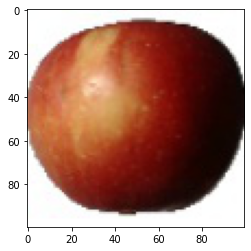

In [21]:
show_example(*dataset[0])


Label:  Apple Golden 3 (4)


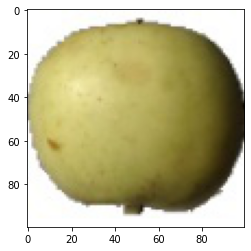

In [23]:
show_example(*dataset[2000])

Label:  Apple Red Yellow 1 (11)


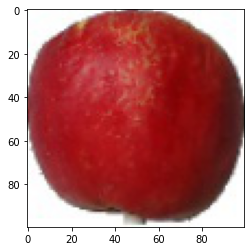

In [24]:
show_example(*dataset[5463])

In [25]:
# Training and Validation Datasets:
# While building real world machine learning models, it is quite common to split the dataset into 3 parts:

# Training set - used to train the model i.e. compute the loss and adjust the weights of the model using gradient descent.
# Validation set - used to evaluate the model while training, adjust hyperparameters (learning rate etc.) and pick the best version of the model.
# Test set - used to compare different models, or different types of modeling approaches, and report the final accuracy of the model. 
# Since there's no predefined validation set, we can set aside a small portion of the training set to be used as the validation set. 
# We'll use the random_split helper method from PyTorch to do this. To ensure that we always create the same validation set.
# we'll also set a seed for the random number generator


In [26]:
# To ensure that we always create the same validation set, we'll also set a seed for the random number generator

In [31]:
random_seed = 42
torch.manual_seed(random_seed);

In [33]:
# let's print the lengths of train_ds and val_ds
val_size = 5000
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(62692, 5000)

In [34]:
# We can now create data loaders for training and validation, to load the data in batches
from torch.utils.data.dataloader import DataLoader

batch_size=128 # The number of samples (data points) that would be passed through the network at a time.


In [35]:
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)

In [36]:
# We can look at batches of images from the dataset using the make_grid method from torchvision. 
# Each time the following code is run, we get a different bach, since the sampler shuffles the indices before creating batches.

In [37]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

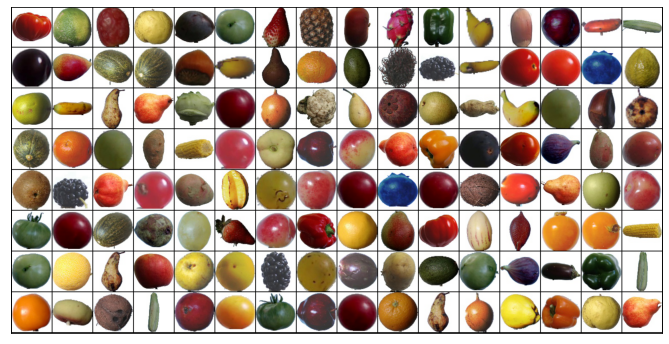

In [38]:
# let's view the grid of batches of images
show_batch(train_dl)

In [ ]:
# As the sizes of our models and datasets increase, we need to use GPUs to train our models within a reasonable amount of time.
# GPUs contain hundreds of cores that are optimized for performing expensive matrix operations on floating point numbers in a short time
# This makes GPU(s) ideal for training deep neural networks with many layers.

In [ ]:
# We can check if a GPU is available and the required NVIDIA CUDA drivers are installed using torch.cuda.is_available.

In [39]:
torch.cuda.is_available()

True

In [40]:
# Let's define a helper function to ensure that our code uses the GPU if available, and defaults to using the CPU if it isn't.

def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
# Next, let's define a function that can move data and model to a chosen device.

def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

# Finally, we define a DeviceDataLoader class to wrap our existing data loaders and move data to the selected device, as a batches are accessed. 
# All we need is an __iter__ method to retrieve batches of data, and an __len__ method to get the number of batches.

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [41]:
# let's check our type of device
device = get_default_device()
device

device(type='cuda')

In [45]:
import torch.nn as nn
import torch.nn.functional as F

In [46]:
# let's define our model

def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        # . A commonly used loss function for classification problems is the cross entropy.
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))

In [47]:
input_size=3*100*100 # parameters
output_size=131

In [ ]:
# NOW LET'S UNDERSTAND FEEDFORWARD NEURAL NETWORKS 

In [ ]:
# Feedforward neural networks were among the first and most successful learning algorithms.
# They are also called deep networks, multi-layer perceptron (MLP), or simply neural networks. 
# As data travels through the network’s artificial mesh, each layer processes an aspect of the data, filters outliers, spots familiar entities and produces the final output

In [ ]:
# NOW LET'S UNDERSTAND LAYERS OF FEEDFORWARD NEURAL NETWORKS 

In [48]:
# Input layer: This layer consists of the neurons that receive inputs and pass them on to the other layers. 
# The number of neurons in the input layer should be equal to the attributes or features in the dataset.
# Output layer: The output layer is the predicted feature and depends on the type of model you’re building.
# Hidden layer: In between the input and output layer, there are hidden layers based on the type of model. 
# Hidden layers contain a vast number of neurons which apply transformations to the inputs before passing them. 
# As the network is trained, the weights are updated to be more predictive. 





In [49]:
# Introducing a hidden layer and an activation function allows the model to learn more complex, multi-layered and non-linear relationships between the inputs and the targets.

In [50]:
class FruitFnnModel(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.linear1=nn.Linear(input_size, 2048) # hidden layer
        self.linear2=nn.Linear(2048, 512) # hidden layer
        self.linear3=nn.Linear(512, 128)  # hidden layer
        self.linear4=nn.Linear(128, 64) #hidden layer
        self.linear5=nn.Linear(64, output_size) # output layer
        
    def forward(self, xb):
        # Flatten images into vectors
        out = xb.view(xb.size(0), -1)
        # Apply layers & activation functions
        out = self.linear1(out)
        out = F.relu(out)
        out = self.linear2(out)
        out = F.relu(out)
        out = self.linear3(out)
        out = F.relu(out)
        out = self.linear4(out)
        out = F.relu(out)
        out = self.linear5(out)
        # Get predictions using output layer
        return out

In [51]:
# TRAINING THE MODEL

In [52]:
# for epoch in range(num_epochs):
    # Training phase
    # for batch in train_loader:
        # Generate predictions
        # Calculate loss
        # Compute gradients
        # Update weights
        # Reset gradients
    
    # Validation phase
   #  for batch in val_loader:
        # Generate predictions
        # Calculate loss
        # Calculate metrics (accuracy etc.)
    # Calculate average validation loss & metrics
    
    # Log epoch, loss & metrics for inspection

In [53]:
@torch.no_grad()

# Here we are using torch.max() function, this function's default behaviour as you can guess by the name is to return maximum among the elements in the Tensor. 
# However, this function also helps get the maximum along a particular dimension, as a Tensor, instead of a single element.
# To specify the dimension (axis – in numpy), there is another optional keyword argument, called dim. This represents the direction that we take for the maximum.
# dim=0, (maximum along columns).
# dim=1 (maximum along rows).

def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch) # extract loss
            train_losses.append(loss)
            loss.backward() # generate gradients
            optimizer.step() # All optimizers implement a step() method, that updates the parameters.
            optimizer.zero_grad() # Clears the gradients of all optimized torch.Tensor,because every time a variable is back propogated through,
            
            # the gradient will be accumulated instead of being replaced.
            
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item() # combine losses
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [54]:
# We have defined an accuracy function which calculates the overall accuracy of the model on an entire batch of outputs, so that we can use it as a metric in fit

In [55]:
# Building Feed-Forward neural networks
Fnn_model = FruitFnnModel()
Fnn_model

FruitFnnModel(
  (linear1): Linear(in_features=30000, out_features=2048, bias=True)
  (linear2): Linear(in_features=2048, out_features=512, bias=True)
  (linear3): Linear(in_features=512, out_features=128, bias=True)
  (linear4): Linear(in_features=128, out_features=64, bias=True)
  (linear5): Linear(in_features=64, out_features=131, bias=True)
)

In [56]:
# Printing out the tensor data of Feed Forward Neural Networks

for images, labels in train_dl:
    print('images.shape:', images.shape)
    out = Fnn_model(images)
    print('out.shape:', out.shape)
    print('out[0]:', out[0])
    break

images.shape: torch.Size([128, 3, 100, 100])
out.shape: torch.Size([128, 131])
out[0]: tensor([ 0.0617,  0.0068, -0.0153, -0.1265,  0.1255,  0.0509,  0.1334, -0.0831,
         0.0418, -0.0221, -0.0486, -0.0556, -0.0644, -0.0064,  0.0158, -0.0090,
        -0.0271,  0.0658,  0.0949,  0.1082,  0.0609,  0.1188,  0.0191,  0.0834,
        -0.0671, -0.1228,  0.0741,  0.1103,  0.0955, -0.0719,  0.0227, -0.0578,
         0.1387,  0.0667,  0.0144, -0.0558, -0.0528, -0.0015,  0.0694, -0.0204,
        -0.0270,  0.0034, -0.0720,  0.0298,  0.0461,  0.1099, -0.0476, -0.0162,
         0.1449, -0.0430,  0.0361, -0.0460,  0.0810,  0.0542, -0.0229, -0.0548,
        -0.0918,  0.0312,  0.0574, -0.0078, -0.0232,  0.1119, -0.0628,  0.0203,
         0.0071,  0.0607,  0.1045, -0.0793,  0.0676, -0.0887,  0.0080, -0.0269,
         0.0863,  0.0541, -0.0326, -0.0866,  0.0949,  0.0115, -0.1053,  0.1234,
         0.0167, -0.0800, -0.0316, -0.0783,  0.0283, -0.1397, -0.0647, -0.0582,
        -0.0743, -0.0497,  0.0182

In [57]:
# We can now wrap our data loaders using DeviceDataLoader.

Fnn_train_dl = DeviceDataLoader(train_dl, device)
Fnn_val_dl = DeviceDataLoader(val_dl, device)
to_device(Fnn_model, device);

In [58]:
# Before we train the model, we need to ensure that the data and the model's parameters (weights and biases) are on the same device (CPU or GPU). 
# We can reuse the to_device function to move the model's parameters to the right device.
Fnn_model = to_device(FruitFnnModel(), device)


In [59]:
# Let's see how the model performs on the validation set with the initial set of weights and biases.
evaluate(Fnn_model, Fnn_val_dl)

{'val_loss': 4.876223564147949, 'val_acc': 0.015579044818878174}

In [60]:
num_epochs = 4 # An epoch is one single pass of all the input data through the network.

# torch.optim is a package implementing various optimization algorithms
opt_func = torch.optim.Adam

# The amount of change to the model during each step of this search process, or the step size, is called the “learning rate” .
# It is the most important hyperparameter to tune for your neural network in order to achieve good performance on your problem.
# Learning rate controls how quickly or slowly a neural network model learns a problem.
lr = 0.001

In [61]:
# We are now ready to train the model. Let's train for 4 epochs and look at the results. 
Fnn_history = fit(num_epochs, lr, Fnn_model, Fnn_train_dl, Fnn_val_dl, opt_func)

Epoch [0], train_loss: 2.8113, val_loss: 1.0287, val_acc: 0.6829
Epoch [1], train_loss: 0.6298, val_loss: 0.3436, val_acc: 0.8883
Epoch [2], train_loss: 0.3113, val_loss: 0.2817, val_acc: 0.8990
Epoch [3], train_loss: 0.1945, val_loss: 0.1131, val_acc: 0.9617


In [62]:
# While the accuracy does continue to increase as we train for more epochs, the improvements get smaller with every epoch. 
# This is easier to see using a line graph.


In [63]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('accuracy vs. number of epochs');

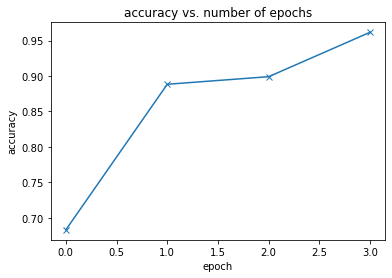

In [64]:
plot_accuracies(Fnn_history)


In [65]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs : ');

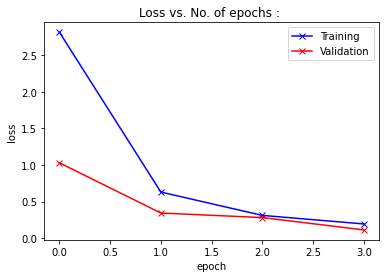

In [66]:
plot_losses(Fnn_history)

In [67]:
# let's check our model's loss and accuracy last time.
evaluate(Fnn_model, Fnn_val_dl)


{'val_loss': 0.11312296241521835, 'val_acc': 0.9617301821708679}

In [68]:
test_dataset = ImageFolder(test_dataset_url, transform=ToTensor())
len(test_dataset)

22688

In [69]:
# NOW LET'S TEST OUR MODEL FOR INDIVIDUAL IMAGES.


In [70]:
# While we have been tracking the overall accuracy of a model so far, it's also a good idea to look at model's results on some sample images. 


In [71]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return dataset.classes[preds[0].item()]

Label: Fig , Predicted: Fig


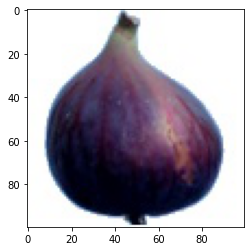

In [74]:
img, label = test_dataset[6877]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, Fnn_model))


In [75]:
# CORRECT


Label: Lemon , Predicted: Lemon


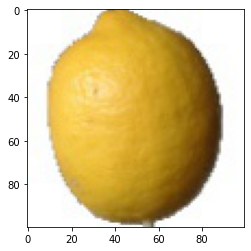

In [76]:
img, label = test_dataset[10000]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, Fnn_model))

In [77]:
# CORRECT


Label: Cherry Wax Black , Predicted: Cherry Wax Black


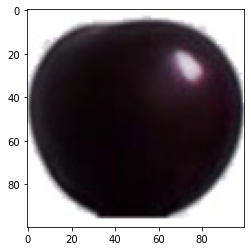

In [78]:
img, label = test_dataset[5000]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, Fnn_model))


In [79]:
# CORRECT

Label: Pear Monster , Predicted: Carambula


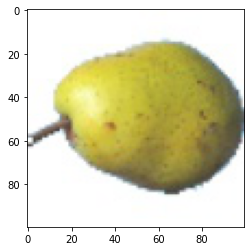

In [80]:
img, label = test_dataset[15000]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, Fnn_model))

In [ ]:
# WRONG

Label: Hazelnut , Predicted: Hazelnut


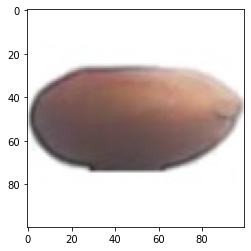

In [81]:
img, label = test_dataset[9109]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, Fnn_model))


In [82]:
# CORRECT

Label: Chestnut , Predicted: Chestnut


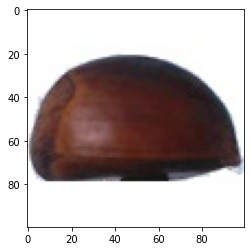

In [83]:
img, label = test_dataset[5440]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, Fnn_model))

In [84]:
# CORRECT

Label: Watermelon , Predicted: Watermelon


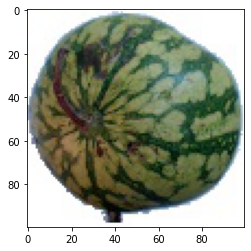

In [85]:
img, label = test_dataset[22687]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, Fnn_model))

In [86]:
# CORRECT

Label: Strawberry Wedge , Predicted: Strawberry Wedge


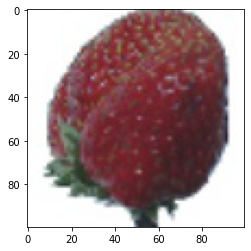

In [87]:
img, label = test_dataset[20000]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, Fnn_model))

In [88]:
# CORRECT

Label: Apple Red Yellow 2 , Predicted: Apple Red Yellow 2


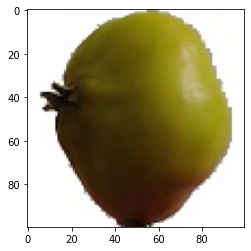

In [89]:
img, label = test_dataset[2000]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, Fnn_model))

In [90]:
# CORRECT

Label: Corn , Predicted: Physalis with Husk


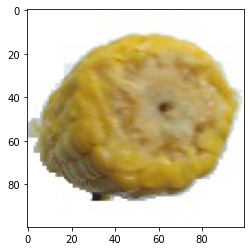

In [92]:
img, label = test_dataset[6000]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, Fnn_model))

In [93]:
# WRONG

In [94]:
evaluate(Fnn_model, Fnn_val_dl)

{'val_loss': 0.11312296241521835, 'val_acc': 0.9617301821708679}

In [95]:
# A state_dict is an integral entity if you are interested in saving or loading models from PyTorch.

torch.save(Fnn_model.state_dict(), 'fruit-Fnn.pth')

In [96]:
pip install jovian --upgrade

     |████████████████████████████████| 63 kB 1.3 MB/s eta 0:00:011
  Created wheel for uuid: filename=uuid-1.30-py3-none-any.whl size=6500 sha256=5ae3b595862e2d644a106d82af191b1aede570f0f03a007184f74839b26bb5ee
  Stored in directory: /root/.cache/pip/wheels/2a/ea/87/dd57f1ecb4f0752f3e1dbf958ebf8b36d920d190425bcdc24d
Successfully built uuid
Note: you may need to restart the kernel to use updated packages.


In [97]:
import jovian

<IPython.core.display.Javascript object>

In [98]:
jovian.commit(project=project_name)


<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Please enter your API key ( from https://jovian.ml/ ):
API KEY: ········
[jovian] Uploading notebook to https://jovian.ml/kanchanjeswani2000/fruit-classification


<IPython.core.display.Javascript object>